In [10]:

import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/basketball/nba_combine_stats.csv'
data = pd.read_csv(file_path)

# Identify relevant fields for similarity calculation
fields_not_normalized = [
    'HAND LENGTH (INCHES)', 'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES', 'HEIGHT W/ SHOES',
    'STANDING REACH', 'WEIGHT (LBS)', 'WINGSPAN', 'LANE AGILITY TIME', 'MODIFIED LANES AGILITY TIME',
    'THREE QUARTER SPRINT', 'STANDING VERTICAL LEAP (INCHES)', 'MAX VERTICAL LEAP (INCHES)',
    'MAX BENCH PRESS (REPETITIONS)', 'OFF DRIBBLE\nCOLLEGE\nBREAK LEFT', 'OFF DRIBBLE\nCOLLEGE\nBREAK RIGHT',
    'OFF DRIBBLE\nCOLLEGE\nTOP KEY', 'OFF DRIBBLE\nFIFTEEN\nBREAK LEFT', 'OFF DRIBBLE\nFIFTEEN\nBREAK RIGHT',
    'OFF DRIBBLE\nFIFTEEN\nTOP KEY', 'ON THE\nMOVE\nCOLLEGE', 'ON THE\nMOVE\nFIFTEEN'
]

# Filter out columns that are not present in the data
fields_not_normalized = [col for col in fields_not_normalized if col in data.columns]

# Convert columns to numeric, coercing errors
for col in fields_not_normalized:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values with 0
data_filled = data[fields_not_normalized].fillna(0)

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

# Separate datasets
data_2024 = data[data['Year'] == 2024]
data_not_2024 = data[data['Year'] != 2024]

# Ensure the index alignment
data_2024_filled = data_filled.loc[data_2024.index]
data_not_2024_filled = data_filled.loc[data_not_2024.index]

# Normalize the feature values using StandardScaler
data_2024_scaled = scaler.fit_transform(data_2024_filled)
data_not_2024_scaled = scaler.transform(data_not_2024_filled)

# Calculate cosine similarity
similarity = cosine_similarity(data_2024_scaled, data_not_2024_scaled)

# Find the most similar player for each 2024 draft player
most_similar_players = {}
for idx, player in data_2024.iterrows():
    similarity_scores = similarity[idx - data_2024.index[0]]
    most_similar_index = similarity_scores.argmax()
    most_similar_player_name = data_not_2024.iloc[most_similar_index]['PLAYER']
    percentage_similarity = (similarity_scores[most_similar_index] + 1) / 2 * 100
    most_similar_players[player['PLAYER']] = most_similar_player_name

# Create a DataFrame for the most similar players
most_similar_players_df = pd.DataFrame(list(most_similar_players.items()), columns=['Player', 'Most Similar Player'])

# Display the results
print(most_similar_players_df)

most_similar_players_df



            Player      Most Similar Player
0    Michael Ajayi           Ron Harper Jr.
1    Melvin Ajinca  Olivier-Maxence Prosper
2   Trey Alexander            Scottie Lewis
3     Izan Almansa          Trendon Watford
4    Reece Beekman          Julian Phillips
..             ...                      ...
78  Ja'Kobe Walter            Scottie Lewis
79     Kel'el Ware             Sidy Cissoko
80   Jamir Watkins                  JT Thor
81    Jaylen Wells         Gabriele Procida
82   Cody Williams            Cason Wallace

[83 rows x 2 columns]


,Player,Most Similar Player
0,Michael Ajayi,Ron Harper Jr.
1,Melvin Ajinca,Olivier-Maxence Prosper
2,Trey Alexander,Scottie Lewis
3,Izan Almansa,Trendon Watford
4,Reece Beekman,Julian Phillips
...,...,...
78,Ja'Kobe Walter,Scottie Lewis
79,Kel'el Ware,Sidy Cissoko
80,Jamir Watkins,JT Thor
81,Jaylen Wells,Gabriele Procida


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and pos

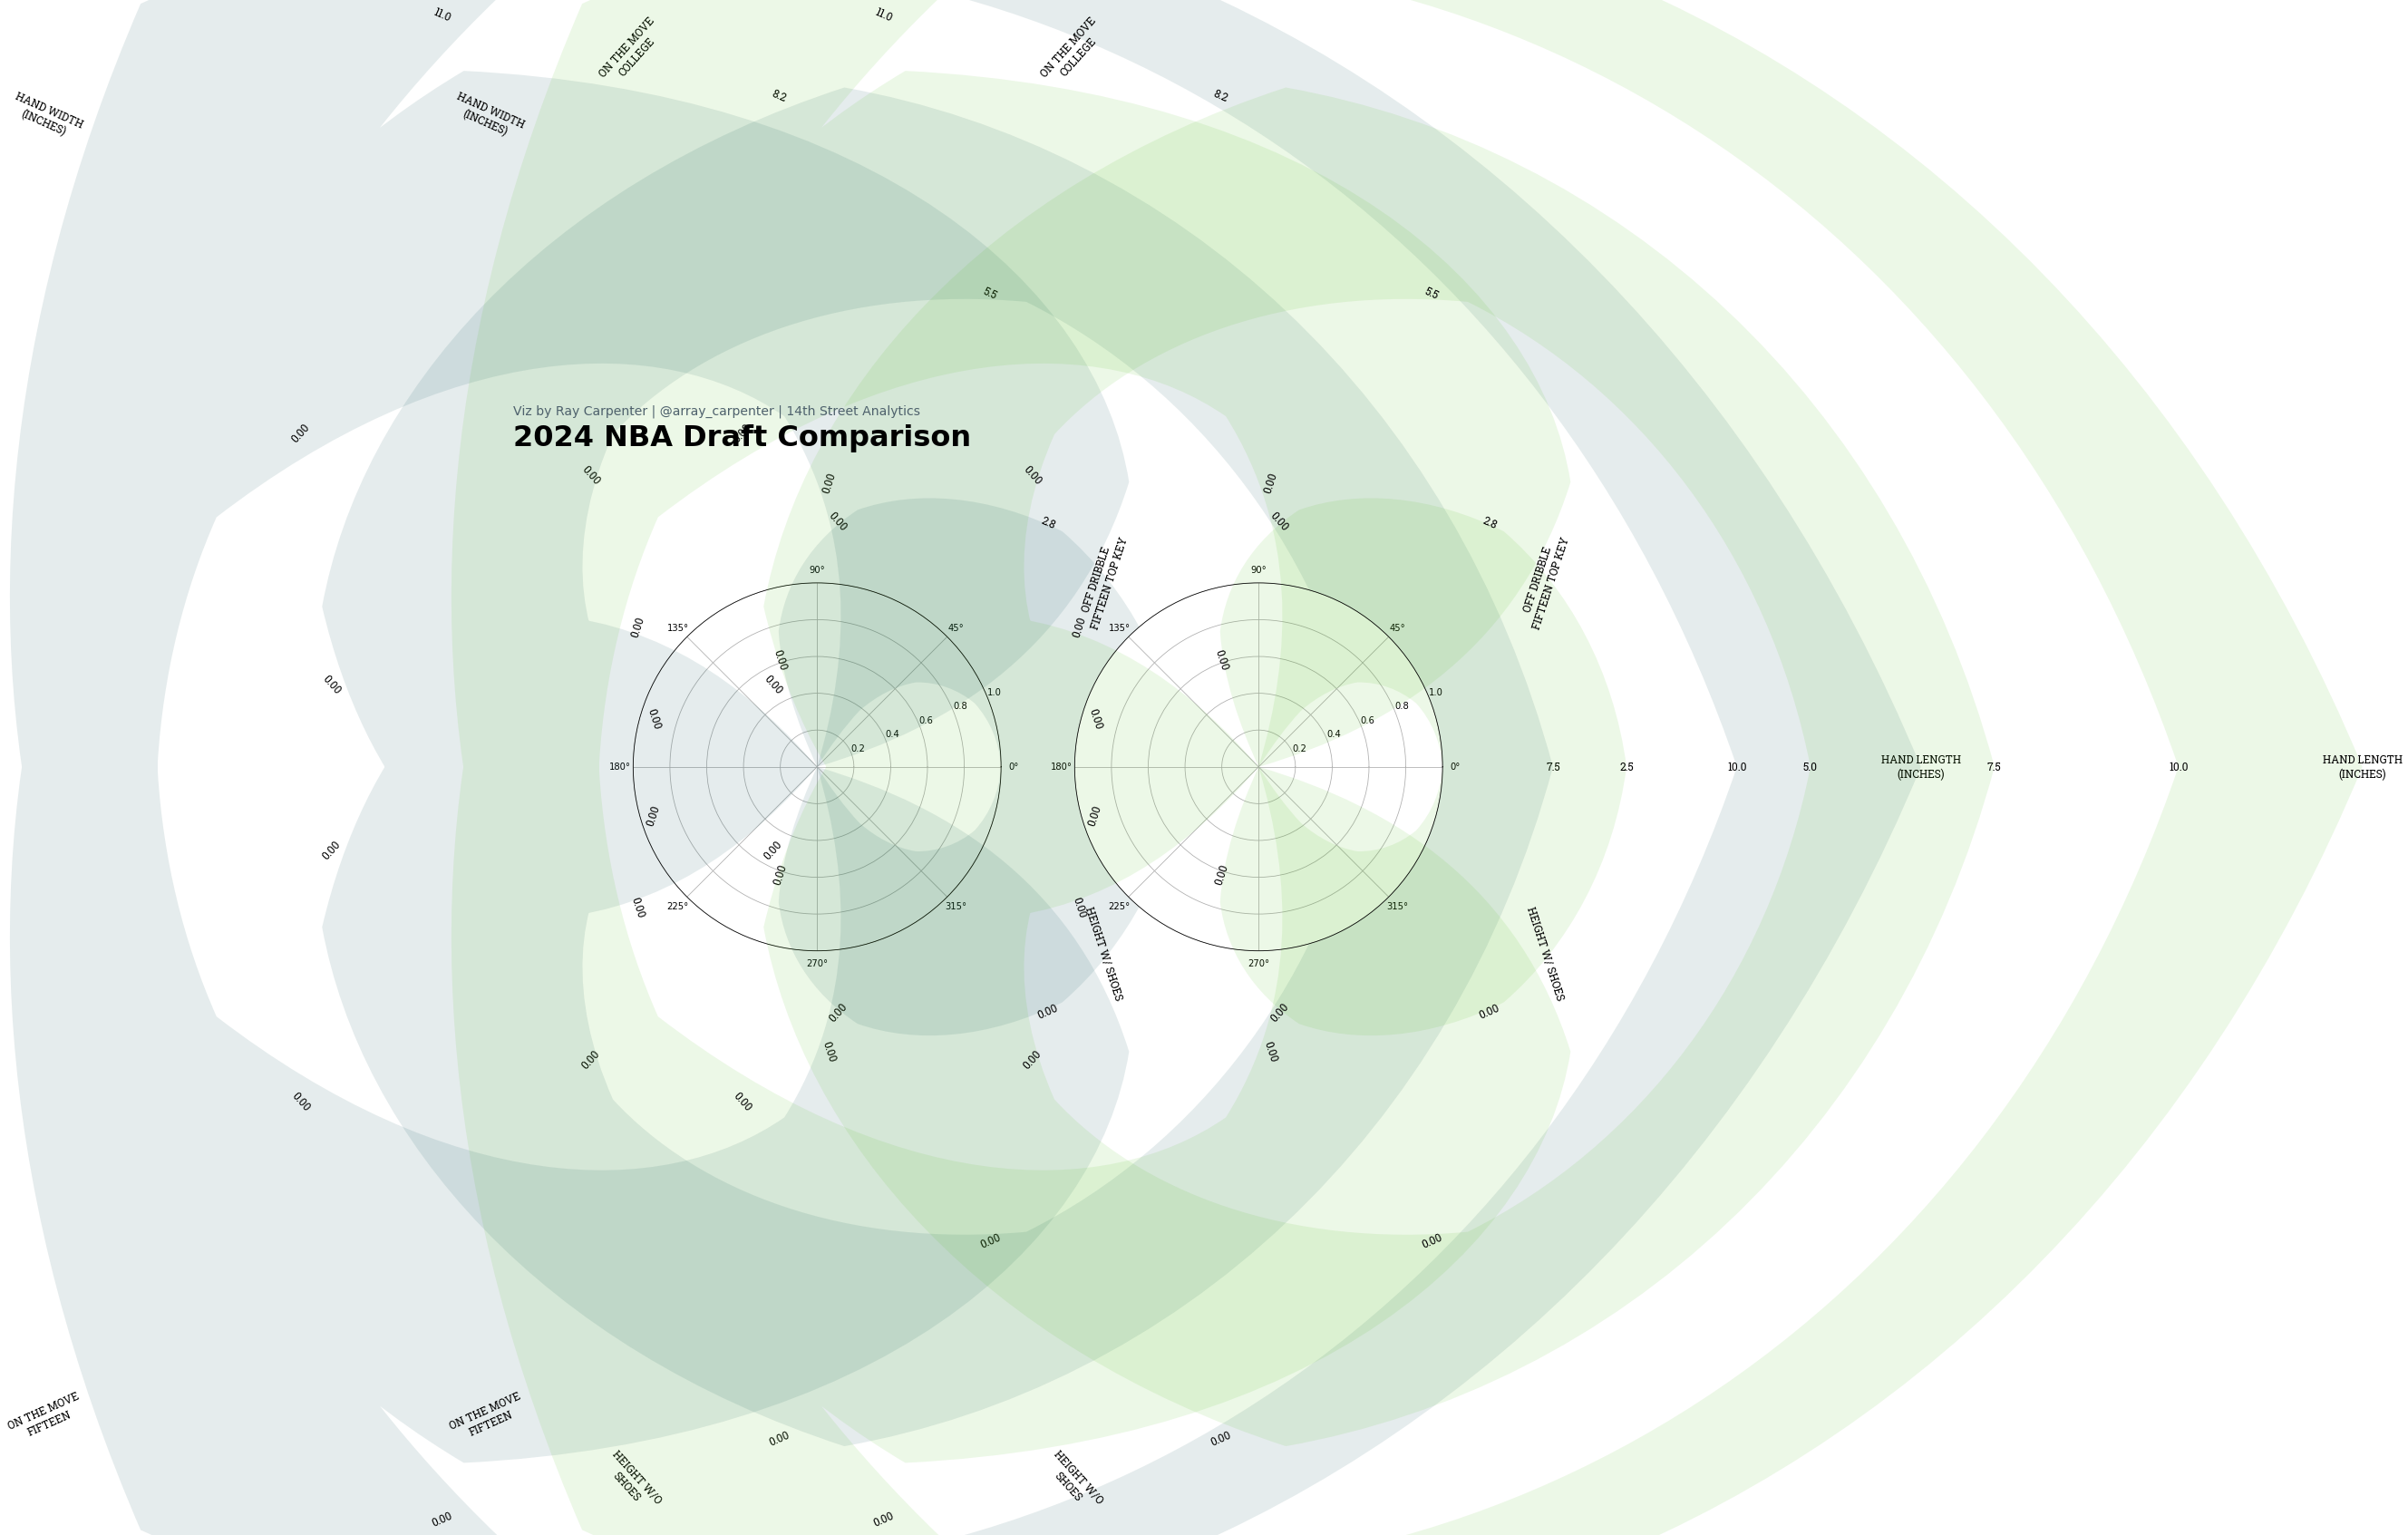

In [18]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from mplsoccer import Radar, FontManager
from matplotlib.gridspec import GridSpec
from highlight_text import fig_text

# Load dataset
file_path = 'C:/Users/RaymondCarpenter/Documents/GitHub/14thstreetanalytics/basketball/nba_combine_stats.csv'
data = pd.read_csv(file_path)

# Identify relevant fields for similarity calculation
fields_not_normalized = [
    'HAND LENGTH (INCHES)', 'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES', 'HEIGHT W/ SHOES',
    'STANDING REACH', 'WEIGHT (LBS)', 'WINGSPAN', 'LANE AGILITY TIME', 'MODIFIED LANES AGILITY TIME',
    'THREE QUARTER SPRINT', 'STANDING VERTICAL LEAP (INCHES)', 'MAX VERTICAL LEAP (INCHES)',
    'MAX BENCH PRESS (REPETITIONS)', 'OFF DRIBBLE\nCOLLEGE\nBREAK LEFT', 'OFF DRIBBLE\nCOLLEGE\nBREAK RIGHT',
    'OFF DRIBBLE\nCOLLEGE\nTOP KEY', 'OFF DRIBBLE\nFIFTEEN\nBREAK LEFT', 'OFF DRIBBLE\nFIFTEEN\nBREAK RIGHT',
    'OFF DRIBBLE\nFIFTEEN\nTOP KEY', 'ON THE\nMOVE\nCOLLEGE', 'ON THE\nMOVE\nFIFTEEN'
]

# Filter out columns that are not present in the data
fields_not_normalized = [col for col in fields_not_normalized if col in data.columns]

# Convert columns to numeric, coercing errors
for col in fields_not_normalized:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Fill missing values with 0
data_filled = data[fields_not_normalized].fillna(0)

# Normalize the feature values using StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_filled)

# Separate datasets
data_2024 = data[data['Year'] == 2024]
data_not_2024 = data[data['Year'] != 2024]

# Ensure the index alignment
data_2024_filled = data_filled.loc[data_2024.index]
data_not_2024_filled = data_filled.loc[data_not_2024.index]

# Normalize the feature values using StandardScaler
data_2024_scaled = scaler.fit_transform(data_2024_filled)
data_not_2024_scaled = scaler.transform(data_not_2024_filled)

# Calculate cosine similarity
similarity = cosine_similarity(data_2024_scaled, data_not_2024_scaled)

# Find the most similar player for each 2024 draft player
most_similar_players = {}
for idx, player in data_2024.iterrows():
    similarity_scores = similarity[idx - data_2024.index[0]]
    most_similar_index = similarity_scores.argmax()
    most_similar_player_name = data_not_2024.iloc[most_similar_index]['PLAYER']
    most_similar_players[player['PLAYER']] = most_similar_player_name

# Parameters for radar chart
lower_is_better = ['LANE AGILITY TIME', 'MODIFIED LANES AGILITY TIME', 'THREE QUARTER SPRINT']

# Font manager for radar chart
URL = 'https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf'
font_manager = FontManager(URL)

# Input for specific 2024 player's name
player_name = input("Enter the name of the 2024 player to compare: ")

try:
    similar_player_name = most_similar_players[player_name]
    
    player_2024_data = data_2024[data_2024['PLAYER'] == player_name][fields_not_normalized].values[0]
    similar_player_data = data_not_2024[data_not_2024['PLAYER'] == similar_player_name][fields_not_normalized].values[0]

    # Filter out statistics that are zero for the 2024 player
    mask = player_2024_data != 0
    params = [fields_not_normalized[i] for i in range(len(mask)) if mask[i]]
    low = np.array([0] * len(params))
    high = np.array([max(data_filled[param]) for param in params])

    player_2024_values = player_2024_data[mask]
    similar_player_values = similar_player_data[mask]

    # Normalize the values to be between the defined low and high
    player_2024_values = (player_2024_values - low) / (high - low)
    similar_player_values = (similar_player_values - low) / (high - low)

    # Radar chart setup
    radar = Radar(params, low, high,
                  lower_is_better=[param for param in lower_is_better if param in params],
                  round_int=[False] * len(params),
                  num_rings=4,
                  ring_width=1, center_circle_radius=1)

    # Create a figure with a custom layout using GridSpec
    fig = plt.figure(figsize=(16, 10), facecolor='white')
    gs = GridSpec(5, 2, fig)

    # Allocate specific axes for the radar charts
    ax1 = fig.add_subplot(gs[1:, 0], polar=True)
    ax2 = fig.add_subplot(gs[1:, 1], polar=True)

    # Add text annotations
    fig_text(
        x=0.01, y=0.95, 
        s="2024 NBA Draft Comparison", 
        va="top", ha="left",
        fontsize=32, color="black", weight="bold",
        fig=fig
    )
    fig_text(
        x=0.01, y=.98, 
        s="Viz by Ray Carpenter | @array_carpenter | 14th Street Analytics",
        va="top", ha="left",
        fontsize=14, color="#4E616C",
        fig=fig
    )

    player_color = '#004C54'
    similar_player_color = '#4CBB17'

    # Draw radar charts
    radar.draw_radar(player_2024_values, ax=ax1,
                     kwargs_radar={'facecolor': player_color, 'alpha': 0.6},
                     kwargs_rings={'facecolor': player_color, 'alpha': 0.1})
    radar.draw_radar(similar_player_values, ax=ax2,
                     kwargs_radar={'facecolor': similar_player_color, 'alpha': 0.6},
                     kwargs_rings={'facecolor': similar_player_color, 'alpha': 0.1})

    # Draw range and parameter labels
    radar.draw_range_labels(ax=ax1, fontsize=12, fontproperties=font_manager.prop)
    radar.draw_param_labels(ax=ax1, fontsize=12, fontproperties=font_manager.prop)
    radar.draw_range_labels(ax=ax2, fontsize=12, fontproperties=font_manager.prop)
    radar.draw_param_labels(ax=ax2, fontsize=12, fontproperties=font_manager.prop)

    plt.show()

except KeyError:
    print("Player not found in the 2024 draft class. Please check the name and try again.")


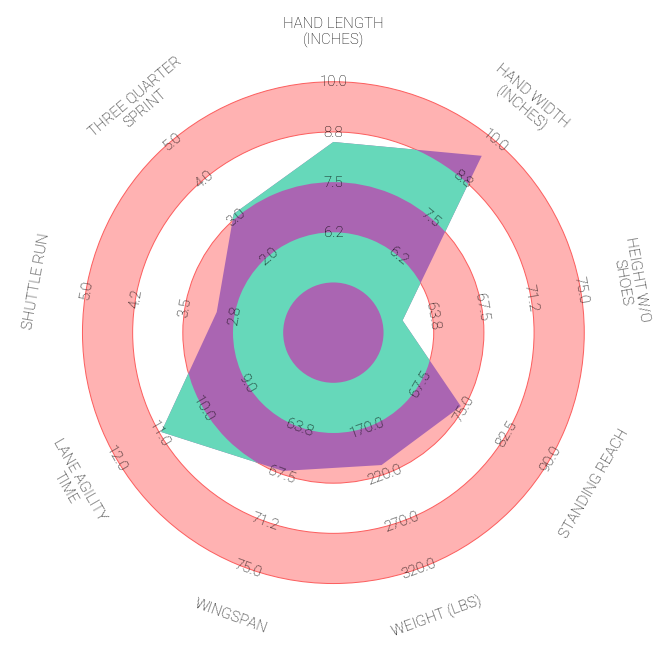

In [28]:
from mplsoccer import radar_chart,Radar, FontManager, grid
import matplotlib.pyplot as plt

# parameter names of the statistics we want to show
params = [
    'HAND LENGTH (INCHES)', 'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES','STANDING REACH','WEIGHT (LBS)','WINGSPAN','LANE AGILITY TIME',
    'SHUTTLE RUN','THREE QUARTER SPRINT'
#     , , , , ,'MODIFIED LANES AGILITY TIME',
#     ', 'STANDING VERTICAL LEAP (INCHES)', 'MAX VERTICAL LEAP (INCHES)',
#     'MAX BENCH PRESS (REPETITIONS)', 'OFF DRIBBLE\nCOLLEGE\nBREAK LEFT', 'OFF DRIBBLE\nCOLLEGE\nBREAK RIGHT',
#     'OFF DRIBBLE\nCOLLEGE\nTOP KEY', 'OFF DRIBBLE\nFIFTEEN\nBREAK LEFT', 'OFF DRIBBLE\nFIFTEEN\nBREAK RIGHT',
#     'OFF DRIBBLE\nFIFTEEN\nTOP KEY', 'ON THE\nMOVE\nCOLLEGE', 'ON THE\nMOVE\nFIFTEEN'
]

# The lower and upper boundaries for the statistics
low =  [5,5,60,60,120,60,8,2,1]
high = [10,10,75,90,320,75,12,5,5]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['LANE AGILITY TIME', 'MODIFIED LANES AGILITY TIME', 'THREE QUARTER SPRINT']

URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

bronny_values =   [8.5,9.5,61.5,74.5,210.4,67.25,10.96,3.02,3.09]

radar = Radar(params, low, high,
              #lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

fig, ax = radar.setup_axis()  # format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # draw circles
radar_output = radar.draw_radar(bronny_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15,
                                       fontproperties=robotto_thin.prop)  # draw the param labels

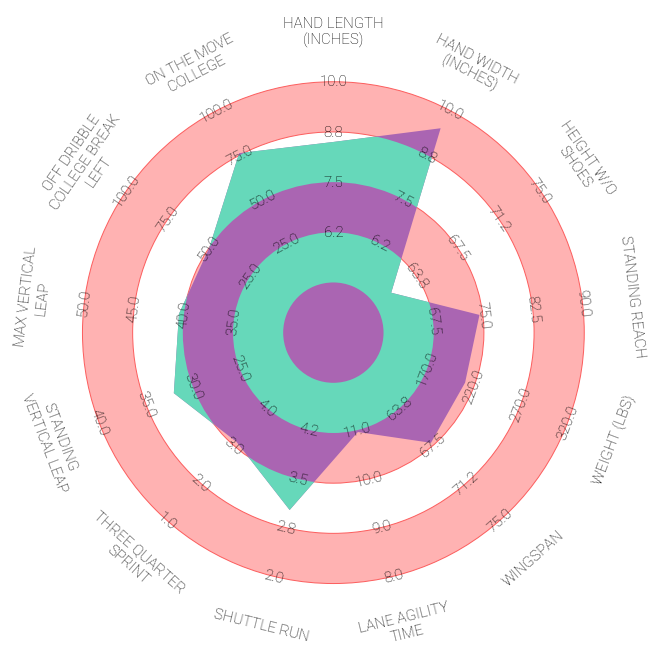

In [30]:
from mplsoccer import radar_chart, Radar, FontManager, grid
import matplotlib.pyplot as plt

# Original parameter names of the statistics we want to show
params = [
    'HAND LENGTH (INCHES)', 'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES', 'STANDING REACH', 'WEIGHT (LBS)', 'WINGSPAN',
    'LANE AGILITY TIME', 'SHUTTLE RUN', 'THREE QUARTER SPRINT', 'BODY FAT %', 'HEIGHT W/ SHOES', 'STANDING VERTICAL LEAP',
    'MAX VERTICAL LEAP', 'MAX BENCH PRESS', 'OFF DRIBBLE COLLEGE BREAK LEFT', 'OFF DRIBBLE COLLEGE BREAK RIGHT',
    'OFF DRIBBLE COLLEGE TOP KEY', 'OFF DRIBBLE FIFTEEN BREAK LEFT', 'OFF DRIBBLE FIFTEEN BREAK RIGHT',
    'OFF DRIBBLE FIFTEEN TOP KEY', 'ON THE MOVE COLLEGE', 'ON THE MOVE FIFTEEN'
]

# The lower and upper boundaries for the statistics
low =  [5, 5, 60, 60, 120, 60, 8, 2, 1, 0, 60, 20, 30, 0, 0, 0, 0, 0, 0, 0, 0, 0]
high = [10, 10, 75, 90, 320, 75, 12, 5, 5, 20, 80, 40, 50, 30, 100, 100, 100, 100, 100, 100, 100, 100]

# Bronny James values
bronny_values = [8.5, 9.5, 61.5, 74.5, 210.4, 67.25, 10.96, 3.02, 3.09, 0, 0, 32, 40.5, 0, 50, 0, 0, 0, 0, 0, 76, 0]

# Filter out the fields where Bronny has a value of 0
filtered_indices = [i for i, value in enumerate(bronny_values) if value != 0]
filtered_params = [params[i] for i in filtered_indices]
filtered_low = [low[i] for i in filtered_indices]
filtered_high = [high[i] for i in filtered_indices]
filtered_values = [bronny_values[i] for i in filtered_indices]

# Add anything to this list where having a lower number is better
lower_is_better = ['LANE AGILITY TIME', 'SHUTTLE RUN', 'THREE QUARTER SPRINT']

# FontManager URLs
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

radar = Radar(filtered_params, filtered_low, filtered_high,
              lower_is_better=lower_is_better,
              round_int=[False] * len(filtered_params),
              num_rings=4,  # The number of concentric circles (excluding center circle)
              ring_width=1, center_circle_radius=1)

fig, ax = radar.setup_axis()  # Format axis as a radar
rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # Draw circles
radar_output = radar.draw_radar(filtered_values, ax=ax,
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})  # Draw the radar
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)  # Draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)  # Draw the param labels

plt.show()


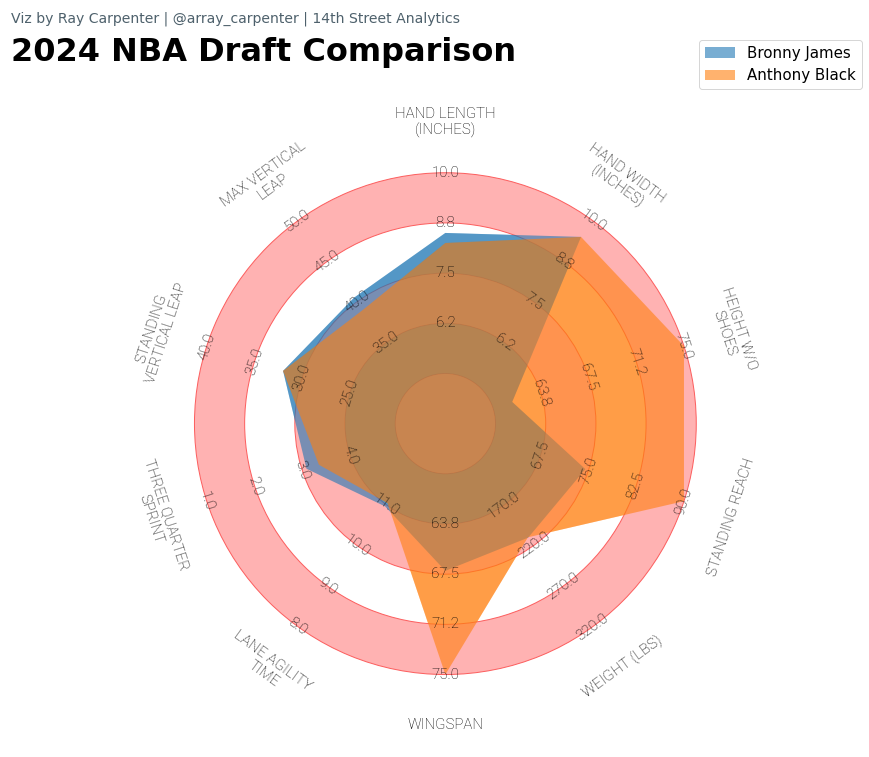

In [37]:
from mplsoccer import radar_chart, Radar, FontManager, grid
from highlight_text import fig_text
import matplotlib.pyplot as plt

# Parameter names of the statistics we want to show
params = [
    'HAND LENGTH (INCHES)', 'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES', 'STANDING REACH', 'WEIGHT (LBS)', 'WINGSPAN',
    'LANE AGILITY TIME', 'SHUTTLE RUN', 'THREE QUARTER SPRINT', 'STANDING VERTICAL LEAP', 'MAX VERTICAL LEAP'
]

# The lower and upper boundaries for the statistics
low =  [5, 5, 60, 60, 120, 60, 8, 2, 1, 20, 30]
high = [10, 10, 75, 90, 320, 75, 12, 5, 5, 40, 50]

# Bronny James values
bronny_values = [8.5, 9.5, 61.5, 74.5, 210.4, 67.25, 10.96, 3.02, 3.09, 32, 40.5]

# Anthony Black's values (excluding fields where Bronny has no value)
anthony_values = [8.25, 9.5, 77.75, 102.5, 210, 79.5, 11.04, 0, 3.35, 32, 39]

# Filter out the fields where Anthony Black has a value of 0 or "-"
filtered_indices = [i for i, value in enumerate(anthony_values) if value != 0 and value != '-']
filtered_params = [params[i] for i in filtered_indices]
filtered_low = [low[i] for i in filtered_indices]
filtered_high = [high[i] for i in filtered_indices]
filtered_anthony_values = [anthony_values[i] for i in filtered_indices]
filtered_bronny_values = [bronny_values[i] for i in filtered_indices]

# Add anything to this list where having a lower number is better
lower_is_better = ['LANE AGILITY TIME', 'SHUTTLE RUN', 'THREE QUARTER SPRINT']

# FontManager URLs
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

radar = Radar(filtered_params, filtered_low, filtered_high,
              lower_is_better=lower_is_better,
              round_int=[False] * len(filtered_params),
              num_rings=4,  # The number of concentric circles (excluding center circle)
              ring_width=1, center_circle_radius=1)

fig, ax = radar.setup_axis()  # Format axis as a radar

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # Draw circles
radar_output_bronny = radar.draw_radar(filtered_bronny_values, ax=ax,
                                       kwargs_radar={'facecolor': '#1f77b4', 'alpha': 0.6},
                                       kwargs_rings={'facecolor': '#1f77b4', 'alpha': 0.4})  # Draw the radar for Bronny James
radar_output_anthony = radar.draw_radar(filtered_anthony_values, ax=ax,
                                        kwargs_radar={'facecolor': '#ff7f0e', 'alpha': 0.6},
                                        kwargs_rings={'facecolor': '#ff7f0e', 'alpha': 0.4})  # Draw the radar for Anthony Black

range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)  # Draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)  # Draw the param labels

# Add a legend and move it to the top right
legend = ax.legend([radar_output_bronny[0], radar_output_anthony[0]],
                   ['Bronny James', 'Anthony Black'],
                   loc='upper right', bbox_to_anchor=(1.15, 1.1), fontsize=15, frameon=True)

# Add title and footer text
fig_text(
    x=0.01, y=0.95, 
    s="2024 NBA Draft Comparison", 
    va="top", ha="left",
    fontsize=32, color="black", weight="bold",
    fig=fig
)
fig_text(
    x=0.01, y=.98, 
    s="Viz by Ray Carpenter | @array_carpenter | 14th Street Analytics",
    va="top", ha="left",
    fontsize=14, color="#4E616C",
    fig=fig
)

plt.show()


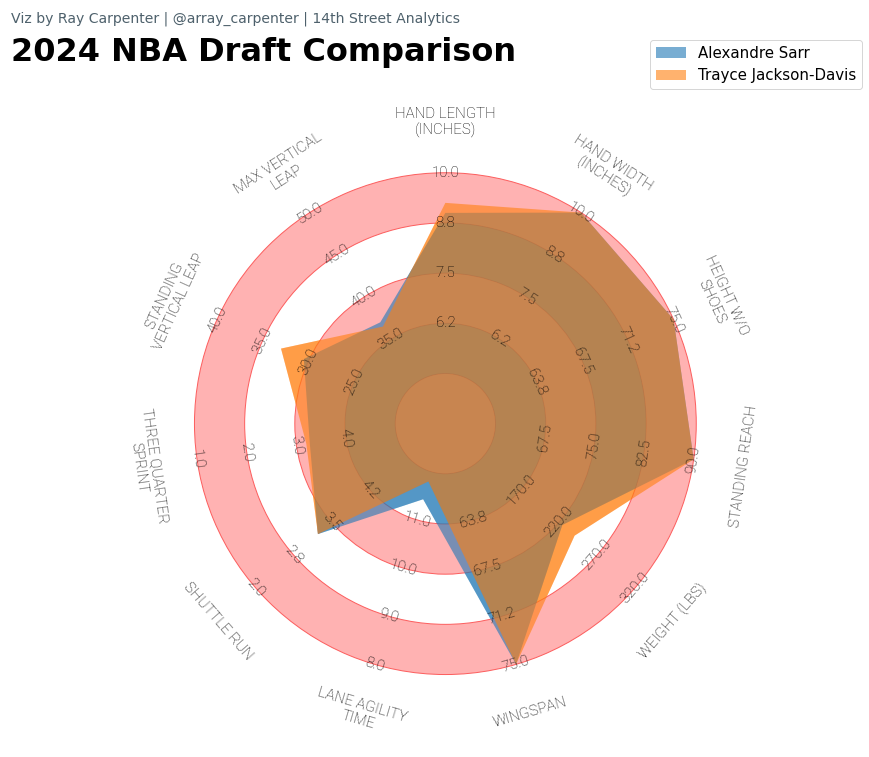

In [38]:
from mplsoccer import radar_chart, Radar, FontManager, grid
from highlight_text import fig_text
import matplotlib.pyplot as plt

# Parameter names of the statistics we want to show
params = [
    'HAND LENGTH (INCHES)', 'HAND WIDTH (INCHES)', 'HEIGHT W/O SHOES', 'STANDING REACH', 'WEIGHT (LBS)', 'WINGSPAN',
    'LANE AGILITY TIME', 'SHUTTLE RUN', 'THREE QUARTER SPRINT', 'STANDING VERTICAL LEAP', 'MAX VERTICAL LEAP'
]

# The lower and upper boundaries for the statistics
low =  [5, 5, 60, 60, 120, 60, 8, 2, 1, 20, 30]
high = [10, 10, 75, 90, 320, 75, 12, 5, 5, 40, 50]

# Alexandre Sarr values
alexandre_values = [9, 10, 83.75, 110, 224.2, 88.25, 11.43, 3.23, 3.27, 30.5, 37]

# Trayce Jackson-Davis values (excluding fields where Alexandre has no value)
trayce_values = [9.25, 10.75, 80.25, 106, 240.4, 85, 11.8, 3.23, 3.2, 33, 36.5]

# Filter out the fields where either player has a value of 0 or "-"
filtered_indices = [i for i, value in enumerate(alexandre_values) if value != 0 and value != '-']
filtered_params = [params[i] for i in filtered_indices]
filtered_low = [low[i] for i in filtered_indices]
filtered_high = [high[i] for i in filtered_indices]
filtered_alexandre_values = [alexandre_values[i] for i in filtered_indices]
filtered_trayce_values = [trayce_values[i] for i in filtered_indices]

# Add anything to this list where having a lower number is better
lower_is_better = ['LANE AGILITY TIME', 'SHUTTLE RUN', 'THREE QUARTER SPRINT']

# FontManager URLs
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

radar = Radar(filtered_params, filtered_low, filtered_high,
              lower_is_better=lower_is_better,
              round_int=[False] * len(filtered_params),
              num_rings=4,  # The number of concentric circles (excluding center circle)
              ring_width=1, center_circle_radius=1)

fig, ax = radar.setup_axis()  # Format axis as a radar

# Set the background color to white
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

rings_inner = radar.draw_circles(ax=ax, facecolor='#ffb2b2', edgecolor='#fc5f5f')  # Draw circles
radar_output_alexandre = radar.draw_radar(filtered_alexandre_values, ax=ax,
                                          kwargs_radar={'facecolor': '#1f77b4', 'alpha': 0.6},
                                          kwargs_rings={'facecolor': '#1f77b4', 'alpha': 0.4})  # Draw the radar for Alexandre Sarr
radar_output_trayce = radar.draw_radar(filtered_trayce_values, ax=ax,
                                       kwargs_radar={'facecolor': '#ff7f0e', 'alpha': 0.6},
                                       kwargs_rings={'facecolor': '#ff7f0e', 'alpha': 0.4})  # Draw the radar for Trayce Jackson-Davis

range_labels = radar.draw_range_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)  # Draw the range labels
param_labels = radar.draw_param_labels(ax=ax, fontsize=15, fontproperties=robotto_thin.prop)  # Draw the param labels

# Add a legend and move it to the top right
legend = ax.legend([radar_output_alexandre[0], radar_output_trayce[0]],
                   ['Alexandre Sarr', 'Trayce Jackson-Davis'],
                   loc='upper right', bbox_to_anchor=(1.15, 1.1), fontsize=15, frameon=True)

# Add title and footer text
fig_text(
    x=0.01, y=0.95, 
    s="2024 NBA Draft Comparison", 
    va="top", ha="left",
    fontsize=32, color="black", weight="bold",
    fig=fig
)
fig_text(
    x=0.01, y=.98, 
    s="Viz by Ray Carpenter | @array_carpenter | 14th Street Analytics",
    va="top", ha="left",
    fontsize=14, color="#4E616C",
    fig=fig
)

plt.show()
